In [1]:
#importing libraries and load data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

#define the path to the Excel File
file_path = r"/content/Prediction Data.xlsx"

#Define sheet name to read the data
sheet_name = 'vw_ChurnData'

# read the data from the specified sheet into a pandas dataframe
data = pd.read_excel("/content/Prediction Data.xlsx", sheet_name = 'vw_ChurnData')

#display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   11965-BIH  Female   38     Yes       Bihar                    4   
1   11987-PUN  Female   43      No      Punjab                   14   
2   11991-RAJ    Male   66     Yes   Rajasthan                   14   
3   12016-TAM  Female   57     Yes  Tamil Nadu                    0   
4   12052-PUN  Female   33      No      Punjab                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                21     Deal 3           Yes            Yes  ...   
1                 6        NaN           Yes             No  ...   
2                15     Deal 2           Yes            Yes  ...   
3                 9     Deal 5           Yes             No  ...   
4                31        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card          -8.00       3204.65         35.82   
1  Bank Withdrawal          69.45 

In [2]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [3]:
# Drop columns that won't be used for prediction

data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]



# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])



#Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})



# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']



# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[803  46]
 [128 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       849
           1       0.83      0.64      0.72       353

    accuracy                           0.86      1202
   macro avg       0.85      0.79      0.81      1202
weighted avg       0.85      0.86      0.85      1202



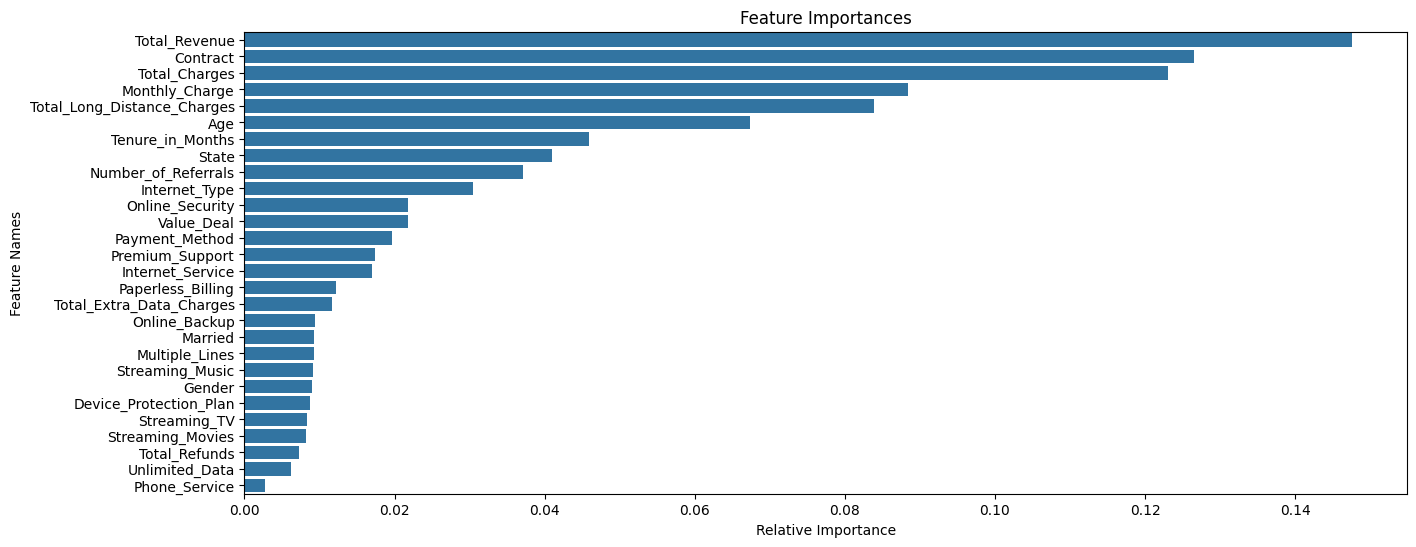

In [5]:
# Make predictions

y_pred = rf_model.predict(X_test)



# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))



# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]



# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [8]:
# Define the path to the Joiner Data Excel file

file_path = r"/content/Prediction Data.xlsx"







# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel("/content/Prediction Data.xlsx")


# Display the first few rows of the fetched data

print(new_data.head())



# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']



# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)



# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])



# Make predictions

new_predictions = rf_model.predict(new_data)



# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions



# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]



# Save the results

original_data.to_csv(r"/content/Predictions.csv", index=False)

  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   11965-BIH  Female   38     Yes       Bihar                    4   
1   11987-PUN  Female   43      No      Punjab                   14   
2   11991-RAJ    Male   66     Yes   Rajasthan                   14   
3   12016-TAM  Female   57     Yes  Tamil Nadu                    0   
4   12052-PUN  Female   33      No      Punjab                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                21     Deal 3           Yes            Yes  ...   
1                 6        NaN           Yes             No  ...   
2                15     Deal 2           Yes            Yes  ...   
3                 9     Deal 5           Yes             No  ...   
4                31        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card          -8.00       3204.65         35.82   
1  Bank Withdrawal          69.45 